# 1 часть: ремонт категорий, увеличение картинок


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from io import BytesIO
from PIL import Image
import cv2


In [177]:
df = pd.read_csv("Train.csv")
df["img_name"] = df["UID"].apply(lambda x: ".".join([x, "jpeg"]))
df.head()

,UID,growth_stage,label_quality,img_name
0,nwuCTQKz,4,2,nwuCTQKz.jpeg
1,NVGUOzWu,1,1,NVGUOzWu.jpeg
2,1IYVvHwA,1,1,1IYVvHwA.jpeg
3,8OEdWwmU,1,1,8OEdWwmU.jpeg
4,oc5iO04j,1,1,oc5iO04j.jpeg


In [178]:
#Вытаскиваю из 1 категории настоящие 1 стадии(до 4 листьев)
df.loc[2074,"label_quality"] = 0 # фото пейзажа из машины
df.loc[7488,"label_quality"] = 2 # точно голое поле
df.loc[10048,"label_quality"] = 0 # полностью черная картинка
df.loc[590,"label_quality"] = 2 # точно голое поле
df.loc[8207,"label_quality"] = 2 # точно голое поле
df.loc[2814,"label_quality"] = 2 # точно голое поле
df.loc[2528,"label_quality"] = 2 # точно голое поле
df.loc[7467,"label_quality"] = 2 # точно голое поле
df.loc[6956,"label_quality"] = 2 # точно голое поле
df.loc[8506,"label_quality"] = 2 # точно голое поле
df.loc[7611,"label_quality"] = 2 # точно голое поле


df.loc[7209,"label_quality"] = 2 # почти голое поле
df.loc[4294,"label_quality"] = 2 # почти голое поле
df.loc[1799,"label_quality"] = 2 # почти голое поле
df.loc[2035,"label_quality"] = 2 # почти голое поле
df.loc[2494,"label_quality"] = 2 # почти голое поле
df.loc[24,"label_quality"] = 2 # почти голое поле

df.loc[10338,"label_quality"] = 2 # почти голое поле
df.loc[2706,"label_quality"] = 1 # скорее 3 стадия
df.loc[2753,"label_quality"] = 0 # не пшеница, а какие-то цветы


#Ремонт 4 категории
df.loc[4252,"label_quality"] = 1 # половина фото занимает куча земли 
df.loc[10453,"label_quality"] = 1 # очень размытое фото 
df.loc[10449,"label_quality"] = 1 # что-то я сильно сомневаюсь, что эти травинки 4 стадии роста


#Ремонт 2 стадии. Убираю из экспертной 2 стадии голую землю
df.loc[4723,"growth_stage"] = 1 # почти голое поле
df.loc[4227,"growth_stage"] = 1 # почти голое поле
df.loc[10208,"growth_stage"] = 1 # почти голое поле
#df.loc[4513,"growth_stage"] = 1 # почти голое поле, а модель считает, что это вторая стадия
df.loc[343,"growth_stage"] = 1 # почти голое поле
df.loc[10646,"growth_stage"] = 1 # почти голое поле

df.loc[2156,"growth_stage"] = 1 # голое поле
df.loc[4127,"growth_stage"] = 1 # голое поле
df.loc[1680,"growth_stage"] = 1 # голое поле
df.loc[3603,"growth_stage"] = 1 # голое поле
df.loc[122,"growth_stage"] = 2 # почти голое поле

# Ремонт 3 стадии
df.loc[7657,"label_quality"] = 1 # по мнению модели, это 2 стадия и на вид она. 
df.loc[1987,"label_quality"] = 1 # по мнению модели, это 2 стадия и на вид она. 
df.loc[8078,"label_quality"] = 1 # по мнению модели, это 4 стадия и на вид она. 
df.loc[2606,"label_quality"] = 1 # по мнению модели, это 4 стадия и на вид она. 
df.loc[633,"label_quality"] = 1 # модель ошибается
df.loc[8184,"label_quality"] = 1 # модель ошибается
df.loc[7950,"label_quality"] = 1 # модель ошибается

# Растягиваю 3 и 4 стадии
df.loc[[1258, 1519, 3156, 4494, 5624, 5960, 6696, 10058, 10280],"label_quality"] = 1

# Ремонт 4 стадии
df.loc[3100,"label_quality"] = 1 # по мнению модели, это 3 стадия и на вид она.
df.loc[2376,"label_quality"] = 1 # по мнению модели, это 3 стадия и на вид она.
df.loc[53,"label_quality"] = 1 # по мнению модели, это 3 стадия и на вид она.
df.loc[1896,"label_quality"] = 1 # по мнению модели, это 3 стадия и на вид она.
df.loc[3775,"label_quality"] = 1 # по мнению модели, это 3 стадия и на вид она.
df.loc[6583,"label_quality"] = 1 # по мнению модели, это 5 стадия и на вид она.
df.loc[5360,"label_quality"] = 1 # по мнению модели, это 5 стадия и на вид она.
df.loc[4656,"label_quality"] = 1 # по мнению модели, это 5 стадия и на вид она.

# Ремонт 5 стадии
df.loc[6488,"label_quality"] = 1 # по мнению модели, это 2 стадия, на вид 1.
df.loc[4569,"label_quality"] = 4 # по мнению модели, это 4 стадия и на вид она.
df.loc[2689,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[10406,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[10477,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[3608,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[3327,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[5586,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[7290,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[7750,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[10406,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[10477,"label_quality"] = 1 # по мнению модели, это 6 стадия

df.loc[[2250, 2414, 2871, 3807, 4439, 4625, 7180, 10502, 3133, 4240],"label_quality"] = 1


#Ремонт 6 категории
df.loc[10507,"label_quality"] = 0 # грядки капусты
df.loc[3686,"label_quality"] = 2 # похоже на цветение
df.loc[2761,"label_quality"] = 2 # похоже на цветение
df.loc[5177,"label_quality"] = 2 # похоже на цветение
df.loc[7280,"label_quality"] = 2 # похоже на цветение
df.loc[5484,"label_quality"] = 2 # похоже на цветение
df.loc[921,"label_quality"] = 2 # похоже на цветение
df.loc[1121,"label_quality"] = 2 # похоже на цветение
df.loc[3528,"label_quality"] = 2 # похоже на цветение
df.loc[7172,"label_quality"] = 2 # похоже на цветение
df.loc[18,"label_quality"] = 2 # похоже на цветение
df.loc[1636,"label_quality"] = 2 # похоже на цветение
df.loc[1706,"label_quality"] = 2 # похоже на цветение
df.loc[2399,"label_quality"] = 2 # похоже на цветение
df.loc[2874,"label_quality"] = 2 # похоже на цветение
df.loc[3528,"label_quality"] = 2 # похоже на цветение
df.loc[4232,"label_quality"] = 2 # похоже на цветение
df.loc[5169,"label_quality"] = 2 # похоже на цветение
df.loc[5189,"label_quality"] = 2 # похоже на цветение
df.loc[5981,"label_quality"] = 2 # похоже на цветение
df.loc[6348,"label_quality"] = 2 # похоже на цветение
df.loc[6698,"label_quality"] = 2 # похоже на цветение
df.loc[7172,"label_quality"] = 2 # похоже на цветение
df.loc[7935,"label_quality"] = 2 # похоже на цветение

df.loc[8904,"label_quality"] = 2 # похоже на цветение
df.loc[9975,"label_quality"] = 2 # похоже на цветение


#Ремонт 7 категории
df.loc[2882,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[3927,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[7750,"label_quality"] = 1 # по мнению модели, это 6 стадия
df.loc[[7722, 8368],"label_quality"] = 1


df[df["UID"].isin(["e3MzqN9F",

])]


,UID,growth_stage,label_quality,img_name
9458,e3MzqN9F,3,2,e3MzqN9F.jpeg


In [179]:
df.loc[2882]

UID                   aHCkYD7T
growth_stage                 7
label_quality                1
img_name         aHCkYD7T.jpeg
Name: 2882, dtype: object

In [180]:
len(os.listdir("images/Images/"))

14251

In [181]:
#Файл с пофиксенными метками
df.to_csv("Train_fixed.csv", index=False)

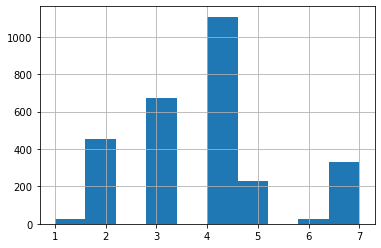

In [182]:
df[df["label_quality"] == 2]["growth_stage"].hist()

In [183]:
folder = "images/Images"

def get_width(img_name):
    img_path = os.path.join(folder, img_name)
        # Read an image with OpenCV
    image = cv2.imread(img_path)
    return image.shape[1]

def get_height(img_name):
    img_path = os.path.join(folder, img_name)
        # Read an image with OpenCV
    image = cv2.imread(img_path)
    return image.shape[0]

# df["width"] = df["img_name"].apply(lambda x: get_width(x))
# df["height"] = df["img_name"].apply(lambda x: get_height(x))
# df.head(10)     

    

## Датасет с label_quality == 2

In [184]:
sm_df = df[df["label_quality"] == 2]
sm_df.shape

(2844, 4)

In [185]:
sm_df.to_csv("small_test.csv", index=False)
sm_df.head(10)

,UID,growth_stage,label_quality,img_name
0,nwuCTQKz,4,2,nwuCTQKz.jpeg
7,sYLqmiXV,3,2,sYLqmiXV.jpeg
10,rDP2EuQN,7,2,rDP2EuQN.jpeg
17,dMTbnE8V,2,2,dMTbnE8V.jpeg
18,va1s7xLd,6,2,va1s7xLd.jpeg
21,HQWkZRNB,2,2,HQWkZRNB.jpeg
24,SVmF1sLv,1,2,SVmF1sLv.jpeg
27,KRa560WZ,7,2,KRa560WZ.jpeg
30,EM8jAJdg,4,2,EM8jAJdg.jpeg
34,3hQnHxzU,4,2,3hQnHxzU.jpeg


In [186]:
sm_df.groupby("growth_stage").count() / sm_df.shape[0]


,UID,label_quality,img_name
growth_stage,,,
1,0.008790,0.008790,0.008790
2,0.159986,0.159986,0.159986
3,0.237342,0.237342,0.237342
4,0.389241,0.389241,0.389241
5,0.081224,0.081224,0.081224
6,0.008087,0.008087,0.008087
7,0.115331,0.115331,0.115331


## Делаю большие картинки

In [187]:
#z6Uv3VsC.jpeg  0dYHGkXf.jpeg
img_path = os.path.join("images/Images/", "0jQFViDH.jpeg")
img = Image.open(img_path)
pix = np.array(img)
pix.shape

(237, 512, 3)

In [188]:
pix[1,1:10,:]

array([[132, 147,  30],
       [136, 150,  39],
       [144, 156,  54],
       [131, 142,  50],
       [143, 152,  73],
       [140, 147,  80],
       [  4,   9,   0],
       [  3,   5,   0],
       [  3,   3,   0]], dtype=uint8)

In [189]:
Image.fromarray().save("temp.jpg")

TypeError: fromarray() missing 1 required positional argument: 'obj'

In [ ]:
base = 224
target_folder = "images/bigImages"
for i in os.listdir("images/Images/"):
    #print(i)
    img_path = os.path.join("images/Images/", i)
    img_source = Image.open(img_path)
    pix = np.array(img_source)
    try:
        med_level = pix[-10:,:,:].mean() * 0.3
        if med_level < 10:
            print(img_path, med_level)
        #print(med_level)
        img = pix[pix.mean(axis = 2).mean(axis = 1) > med_level] # отрезаю черные горизонтальные полосы
        if img.shape[0] == 0:
            print("упс", img_path)
            img = pix
        height = img.shape[0]
        width = img.shape[1]
        #print(img)
        images = [img, img, img]
        #print("height", images[2].size[1])
        new_height = images[2].shape[0]
        new_width = images[2].shape[1]
        while new_height < 2 * base:
            images[2] = np.vstack([images[1], images[0]])
            #print(images[2].shape)
            images[1] = images[2]
            #print("height", images[2].shape[0])
            new_height = images[2].shape[0]


        while new_width < 1.7 * base: # target = 380 px
            images[2] = np.hstack([images[2], images[2]])
            print(new_width)
            new_width = images[2].shape[1]


        # если картинка склеена, то она - массив, а если нет, то PIL объект
        try:
            images[2].save(os.path.join(target_folder, i))
        except:
            Image.fromarray(images[2]).save(os.path.join(target_folder, i))
    except:
        print(img_path)

In [ ]:
bad image  images/Images/DSZPoVxv.jpeg
images/Images/VMNgikot.jpeg